In [1]:
import numpy as np
import matplotlib.pyplot as plt


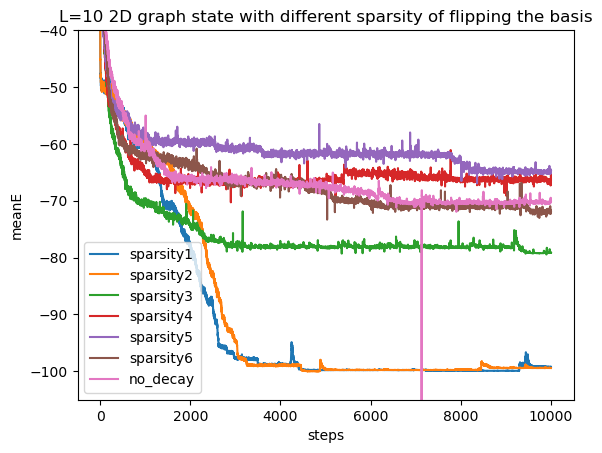

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


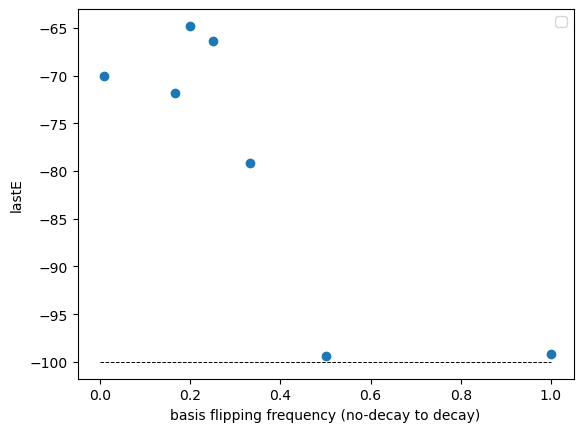

In [13]:
import matplotlib.pyplot as plt
import numpy as np
E1 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_seed3.npy")
E2 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity2_seed3.npy")
E3 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity3_seed3.npy")
E4 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity4_seed3.npy")
E5 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity5_seed3.npy")
E6 = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity6_seed3.npy")
En = np.load("../New_model_2dgf_general/result/meanE_L10cmi_pattern_ordered_random_sparsity102_seed3.npy")
min_E1 = E1[-1]
min_E2 = E2[-1]
min_E3 = E3[-1]
min_E4 = E4[-1]
min_E5 = E5[-1]
min_E6 = E6[-1]
min_En = En[-1]
plt.plot(E1, label="sparsity1")
plt.plot(E2, label="sparsity2")
plt.plot(E3, label="sparsity3")
plt.plot(E4, label="sparsity4")
plt.plot(E5, label="sparsity5")
plt.plot(E6, label="sparsity6")
plt.plot(En, label="no_decay")
plt.legend()
plt.xlabel("steps")
plt.ylabel("meanE")
plt.ylim(-105, -40)
plt.title("L=10 2D graph state with different sparsity of flipping the basis")
plt.show()
plt.xlabel("basis flipping frequency (no-decay to decay)")
plt.ylabel("lastE")
plt.plot([0, 1.], [-100, -100], 'k--', linewidth=0.7)
plt.scatter([1/1., 1/2., 1/3., 1/4., 1/5., 1/6., 1/102.], [min_E1, min_E2, min_E3, min_E4, min_E5, min_E6, min_En])
plt.legend()
plt.show()

(7200,)


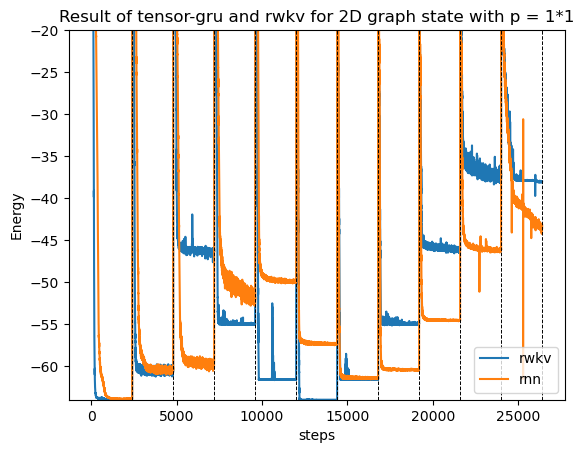

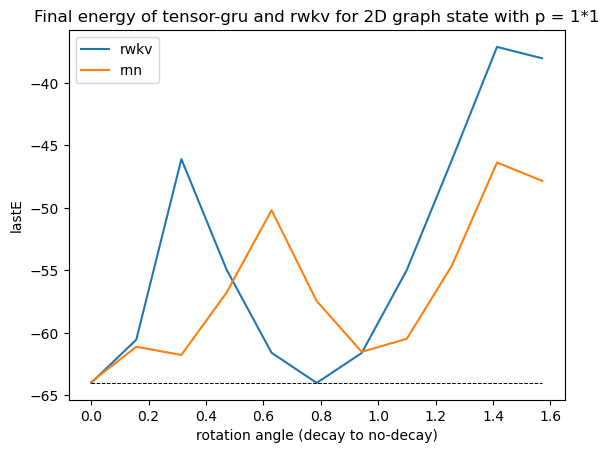

In [16]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
meanE_middle = np.load("../rwkv/patched_rnn_rwkv/result/meanE_L8_units4_cmi_pattern_decayrotationTrueangle1.413716694115407_seed3_patch1.npy")
meanE_angle = np.load("../rwkv/patched_rnn_rwkv/result/meanE_L8_units4_cmi_pattern_decayrotationTrueangle3.141592653589793_seed3_patch1.npy")
print(meanE_angle.shape)
meanE = np.concatenate((meanE_angle[:2400], meanE_middle, meanE_angle[2400:4800]), axis = 0)
meanE2 = np.load("../rwkv/patched_rnn_rwkv/result/meanE_L8_rnn.npy")
Elast = meanE.reshape(11, -1)[:, -1]
Elast2 = meanE2.reshape(11, -1)[:, -1]

plt.plot(np.arange(meanE.shape[0]), meanE, label = "rwkv")
plt.plot(np.arange(meanE.shape[0]), meanE2[:, :2400].ravel(), label = "rnn")
for i in (np.arange(11)+1)*2400:
    plt.plot([i, i], [-64, -10], 'k--', linewidth=0.7)
plt.ylim(-64, -20)
plt.xlabel("steps")
plt.ylabel("Energy")
plt.title("Result of tensor-gru and rwkv for 2D graph state with p = 1*1")
plt.legend()
plt.show()
plt.xlabel("rotation angle (decay to no-decay)")
plt.ylabel("lastE")
plt.plot(jnp.arange(11)/10*jnp.pi/2, Elast, label = "rwkv")
plt.plot(jnp.arange(11)/10*jnp.pi/2, Elast2, label = "rnn")
plt.plot([0, jnp.pi/2], [-64, -64], 'k--', linewidth=0.7)
plt.title("Final energy of tensor-gru and rwkv for 2D graph state with p = 1*1")
plt.legend()
plt.show()

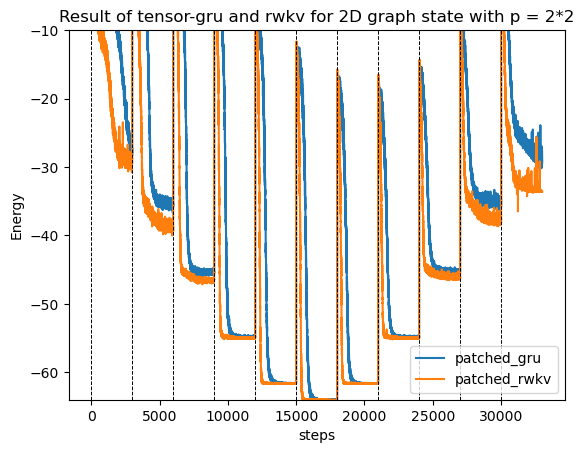

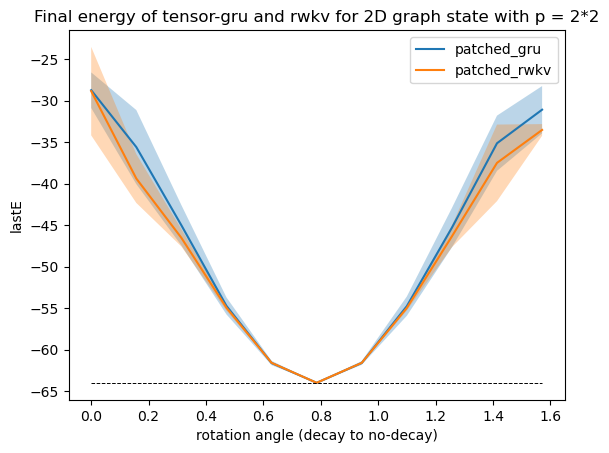

In [44]:
meanE_patch = np.load("../rwkv/patched_rnn_rwkv/result/rwkv_meanE_L4_units4_cmi_pattern_decayrotationTrueangle1.5707963267948966_seed3_patch4.npy")
varE_patch = np.load("../rwkv/patched_rnn_rwkv/result/rwkv_varE_L4_units4_cmi_pattern_decayrotationTrueangle1.5707963267948966_seed3_patch4.npy")
meanE_patched_rnn = np.load("../rwkv/patched_rnn_rwkv/result/meanE_L4_units32_cmi_pattern_decayrotationTrueangle1.5707963267948966_seed3.npy")
varE_patched_rnn = np.load("../rwkv/patched_rnn_rwkv/result/varE_L4_units32_cmi_pattern_decayrotationTrueangle1.5707963267948966_seed3.npy")
Elast_patch = meanE_patch.reshape(11, -1)[:, -1]
Elast_patched_rnn = meanE_patched_rnn.reshape(11, -1)[:, -1]
varElast_patch = np.sqrt(varE_patch.reshape(11, -1)[:, -1])
varElast_patched_rnn = np.sqrt(varE_patched_rnn.reshape(11, -1)[:, -1])
indice_1 = np.arange(11)*6000
indice_2 = np.arange(11)*6000+3000
E = []
for i in range(11):
    E.append(meanE_patched_rnn[indice_1[i]:indice_2[i]])
plt.plot(np.array(E).ravel(), label = "patched_gru")
plt.plot(meanE_patch, label = "patched_rwkv")
for i in jnp.arange(11)*3000:
    plt.plot([i, i], [-64, -10], 'k--', linewidth=0.7)
plt.ylim(-64, -10)
plt.xlabel("steps")
plt.ylabel("Energy")
plt.title("Result of tensor-gru and rwkv for 2D graph state with p = 2*2")
plt.legend()
plt.show()
plt.xlabel("rotation angle (decay to no-decay)")
plt.ylabel("lastE")
plt.plot(jnp.arange(11)/10*jnp.pi/2, Elast_patched_rnn, label = "patched_gru")
plt.fill_between(jnp.arange(11)/10*jnp.pi/2, Elast_patched_rnn-varElast_patched_rnn, Elast_patched_rnn+varElast_patched_rnn, alpha = 0.3)
plt.plot(jnp.arange(11)/10*jnp.pi/2, Elast_patch, label = "patched_rwkv")
plt.fill_between(jnp.arange(11)/10*jnp.pi/2, Elast_patch-varElast_patch, Elast_patch+varElast_patch, alpha = 0.3)
plt.plot([0, jnp.pi/2], [-64, -64], 'k--', linewidth=0.7)
plt.title("Final energy of tensor-gru and rwkv for 2D graph state with p = 2*2")
plt.legend()
plt.show()

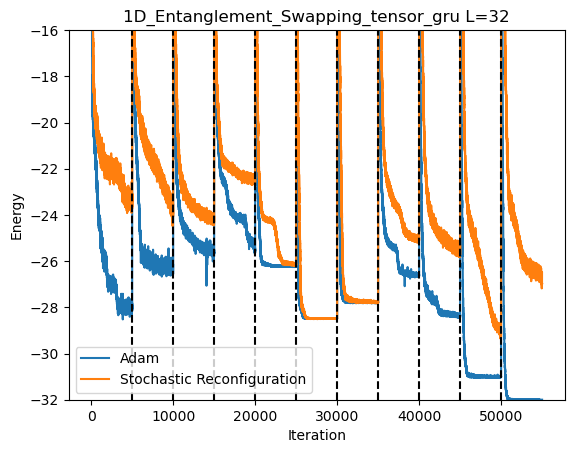

In [19]:

E_sr1 = np.load("../patched_rnn_1des/result/meanE_L32_units8_cmi_pattern_no_decayrotationTrueangle1.413716694115407_seed3___.npy")
E_sr2 = np.load("../patched_rnn_1des/result/meanE_L32_units8_cmi_pattern_no_decayrotationTrueangle1.413716694115407_seed3.npy")
backup1, backup2 = E_sr1[5000:10000].copy(), E_sr2[5000:10000].copy()
E_sr1[5000:50000], E_sr2[5000:50000] = E_sr1[10000:55000], E_sr2[10000:55000]
E_sr1[50000:55000], E_sr2[50000:55000] = backup1, backup2
plt.plot(E_sr1, label = "Adam")
plt.plot(E_sr2, label = "Stochastic Reconfiguration")
plt.title("1D_Entanglement_Swapping_tensor_gru L=32")
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.ylim(-32, -16)
x = np.repeat((np.arange(10)+1)*5000, 2).reshape(10, 2)
for i in range(len(x)):
    plt.plot(x[i], [-32, 0], color = 'black', linestyle = 'dashed')
    
plt.legend()
plt.show()

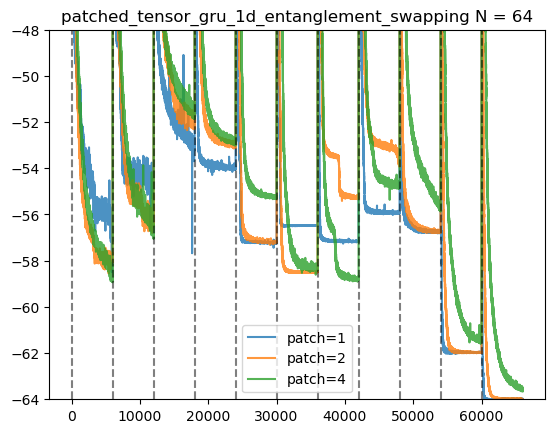

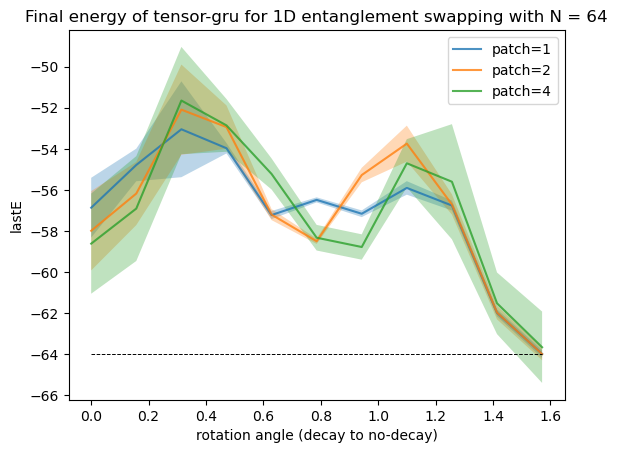

In [41]:
E1 = np.load("../patched_rnn_1des/result/meanE_L64_units64_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
E1 = E1.reshape((11, -1))[:, :6000].ravel()
E1_var = np.load("../patched_rnn_1des/result/varE_L64_units64_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
E2 = np.load("../patched_rnn_1des/result/meanE_L32_patch2_units32_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
E2_var = np.load("../patched_rnn_1des/result/varE_L32_patch2_units32_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
E4 = np.load("../patched_rnn_1des/result/meanE_L16_patch4_units32_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
E4_var = np.load("../patched_rnn_1des/result/varE_L16_patch4_units32_cmi_pattern_no_decayrotationTrueangle1.5707963267948966_seed3.npy")
Erwkv = np.load("../patched_rnn_1des/result/meanE_L16patch_4_emb_size16_hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
lastE1 = E1.reshape(11, -1)[:, -1]
lastE2 = E2.reshape(11, -1)[:, -1]
lastE4 = E4.reshape(11, -1)[:, -1]
last_E1var = np.sqrt(E1_var.reshape(11, -1)[:, -1])
last_E2var = np.sqrt(E2_var.reshape(11, -1)[:, -1])
last_E4var = np.sqrt(E4_var.reshape(11, -1)[:, -1])
plt.plot(np.arange(E1.shape[0]), E1, label = "patch=1", alpha = 0.8)
plt.plot(np.arange(E2.shape[0]), E2, label = "patch=2", alpha = 0.8)
plt.plot(np.arange(E4.shape[0]), E4, label = "patch=4", alpha = 0.8)
for i in range(11):
    plt.plot([i*6000, i*6000], [-64, -48], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.ylim(-64, -48)
plt.title("patched_tensor_gru_1d_entanglement_swapping N = 64")
plt.legend()
plt.show()

plt.title("Final energy of tensor-gru for 1D entanglement swapping with N = 64")
plt.plot(np.arange(11)/10*jnp.pi/2, lastE1, label = "patch=1", alpha = 0.8)
plt.fill_between(np.arange(11)/10*jnp.pi/2, lastE1-last_E1var, lastE1+last_E1var, alpha = 0.3)
plt.plot(np.arange(11)/10*jnp.pi/2, lastE2, label = "patch=2", alpha = 0.8)
plt.fill_between(np.arange(11)/10*jnp.pi/2, lastE2-last_E2var, lastE2+last_E2var, alpha = 0.3)
plt.plot(np.arange(11)/10*jnp.pi/2, lastE4, label = "patch=4", alpha = 0.8)
plt.fill_between(np.arange(11)/10*jnp.pi/2, lastE4-last_E4var, lastE4+last_E4var, alpha = 0.3)
plt.xlabel("rotation angle (decay to no-decay)")
plt.ylabel("lastE")
plt.plot([0, jnp.pi/2], [-64, -64], 'k--', linewidth=0.7)
plt.legend()
plt.show()

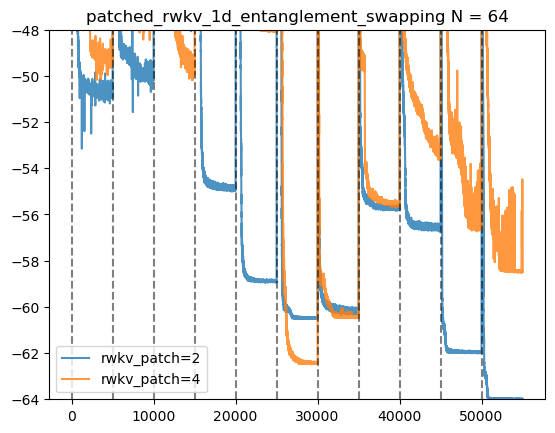

C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5404: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5405: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5408: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5410: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


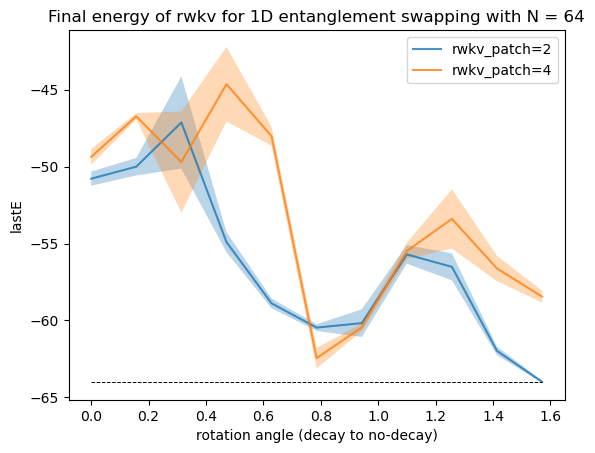

In [39]:
E2 = np.load("../rwkv/patched_rwkv_1des/result/meanE_L32patch_2_emb_size16_hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
E2_var = np.load("../rwkv/patched_rwkv_1des/result/varE_L32patch_2_emb_size16hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
E4 = np.load("../rwkv/patched_rwkv_1des/result/meanE_L16patch_4_emb_size16_hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
E4_var = np.load("../rwkv/patched_rwkv_1des/result/varE_L16patch_4_emb_size16hidden_size32rotationTrueangle1.5707964_seed3numsamples256.npy")
lastE2 = E2.reshape(11, -1)[:, -1]
lastE4 = E4.reshape(11, -1)[:, -1]
last_var2 = np.sqrt(E2_var.reshape(11, -1)[:, -1])
last_var4 = np.sqrt(E4_var.reshape(11, -1)[:, -1])
plt.plot(np.arange(E2.shape[0]), E2, label = "rwkv_patch=2", alpha = 0.8)
plt.plot(np.arange(E4.shape[0]), E4, label = "rwkv_patch=4", alpha = 0.8)
for i in range(11):
    plt.plot([i*5000, i*5000], [-64, -32], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.ylim(-64, -48)
plt.title("patched_rwkv_1d_entanglement_swapping N = 64")
plt.legend()
plt.show()

plt.title("Final energy of rwkv for 1D entanglement swapping with N = 64")
plt.plot(np.arange(11)/10*jnp.pi/2, lastE2, label = "rwkv_patch=2", alpha = 0.8)
plt.fill_between(np.arange(11)/10*jnp.pi/2, lastE2-last_var2, lastE2+last_var2, alpha = 0.3)
plt.plot(np.arange(11)/10*jnp.pi/2, lastE4, label = "rwkv_patch=4", alpha = 0.8)
plt.fill_between(np.arange(11)/10*jnp.pi/2, lastE4-last_var4, lastE4+last_var4, alpha = 0.3)
plt.xlabel("rotation angle (decay to no-decay)")
plt.ylabel("lastE")
plt.plot([0, jnp.pi/2], [-64, -64], 'k--', linewidth=0.7)
plt.legend()
plt.show()

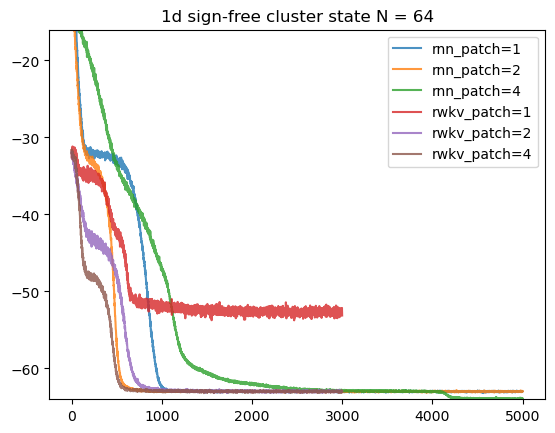

In [21]:
E1 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L64_patch1_units32_cmi_pattern_no_decayrotationTrueangle1e-06_seed3.npy")
E2 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L32_patch2_units32_cmi_pattern_no_decayrotationTrueangle1e-06_seed3.npy")
E4 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L16_patch4_units32_cmi_pattern_no_decayrotationTrueangle1e-06_seed3.npy")
Er1 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L64patch_1_emb_size16_hidden_size32rotationTrueangle1e-06_seed3numsamples256.npy")
Er2 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L32patch_2_emb_size4_hidden_size32rotationTrueangle1e-06_seed3numsamples256.npy")
Er4 = np.load("../patched_rnn_1d_sign_free_cluster/result/meanE_L16patch_4_emb_size16_hidden_size32rotationTrueangle1e-06_seed3numsamples256.npy")
plt.plot(np.arange(E1.shape[0]), E1, label = "rnn_patch=1", alpha = 0.8)
plt.plot(np.arange(E2.shape[0]), E2, label = "rnn_patch=2", alpha = 0.8)
plt.plot(np.arange(E4.shape[0]), E4, label = "rnn_patch=4", alpha = 0.8)
plt.plot(np.arange(Er1.shape[0]), Er1, label = "rwkv_patch=1", alpha = 0.8)
plt.plot(np.arange(Er2.shape[0]), Er2, label = "rwkv_patch=2", alpha = 0.8)
plt.plot(np.arange(Er4.shape[0]), Er4, label = "rwkv_patch=4", alpha = 0.8)
plt.ylim(-64, -16)

plt.title("1d sign-free cluster state N = 64")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
1
2
3
4
5
6
7
8
9
10


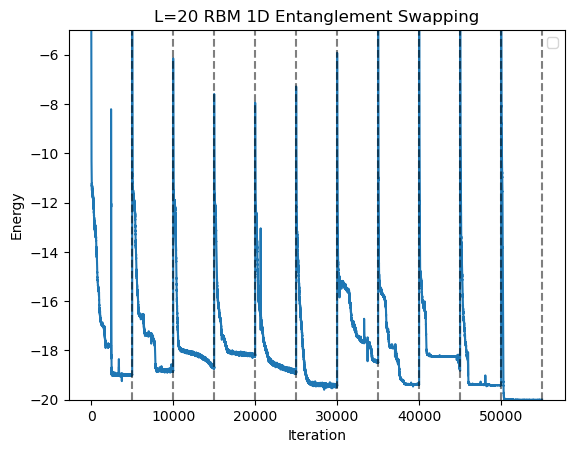

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


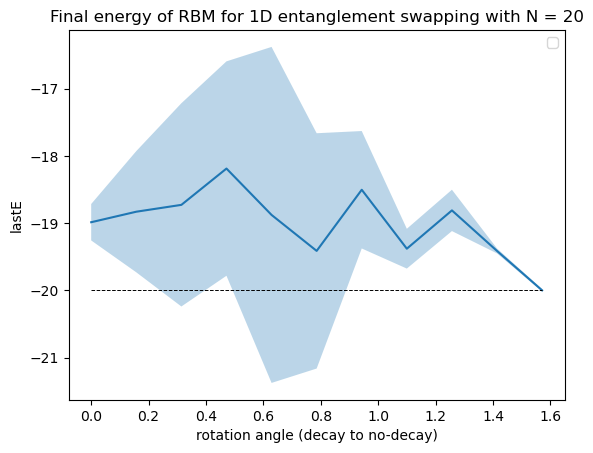

In [37]:
import numpy as np
import json
import matplotlib.pyplot as plt
iters_ = []
E = []
E_var = []
a = 11
for i in range (a):
    print(i)
    data=json.load(open("../netket_1des/RBM"+str(i)+"L=20_numsample=4096"+".log"))
    iters = data['Energy']['iters']
    iters_.append(iters)
    energy=data['Energy']['Mean']['real']
    E.append(energy)
    E_var.append(data['Energy']['Variance'])
flat_iter = [
    x
    for xs in iters_
    for x in xs
]
flat_E = [
    x
    for xs in E
    for x in xs
]
flat_E_var = [
    x
    for xs in E_var
    for x in xs
]
flat_iter = np.arange(len(flat_iter))
plt.plot(flat_iter, flat_E)
plt.title("L=20 RBM 1D Entanglement Swapping")
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.ylim(-20, -5)
x = np.repeat(np.linspace(5000, 55000, 11), 2).reshape(11, 2)
for i in range(len(x)):
    plt.plot(x[i], [-20, 0], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.legend()
plt.show()

lastE = np.array(E).reshape(11, -1)[:, -1]
plt.plot(np.arange(11)/10*np.pi/2, lastE)
plt.fill_between(np.arange(11)/10*np.pi/2, lastE-np.sqrt(np.array(E_var).reshape(11, -1)[:, -1]), lastE+np.sqrt(np.array(E_var).reshape(11, -1)[:, -1]), alpha = 0.3)
plt.title("Final energy of RBM for 1D entanglement swapping with N = 20")
plt.xlabel("rotation angle (decay to no-decay)")
plt.ylabel("lastE")
plt.plot([0, np.pi/2], [-20, -20], 'k--', linewidth=0.7)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
1
2
3
4
5
6
7
8
9
10


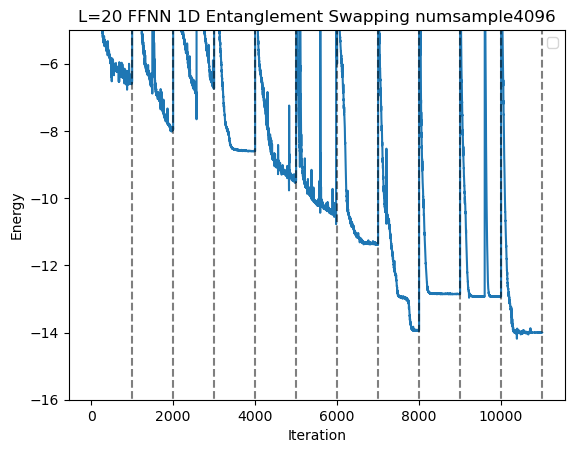

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


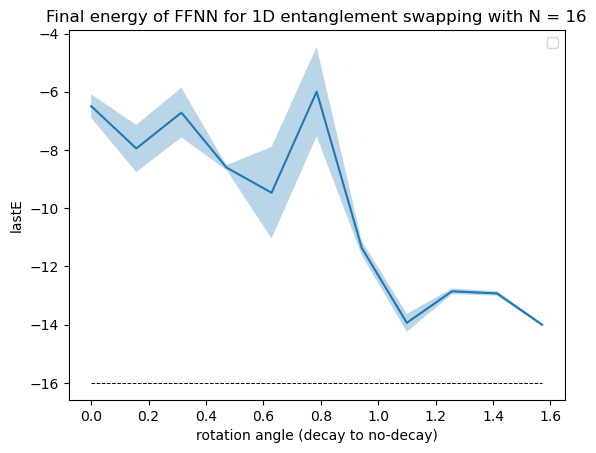

In [36]:
import numpy as np
import json
import matplotlib.pyplot as plt
iters_ = []
E = []
E_var = []
a = 11
for i in range (a):
    print(i)
    data=json.load(open("../netket_1des/FFNN/FFNN"+str(i)+".log"))
    iters = data['Energy']['iters']
    iters_.append(iters)
    energy=data['Energy']['Mean']['real']
    E.append(energy)
    E_var.append(data['Energy']['Variance'])
flat_iter = [
    x
    for xs in iters_
    for x in xs
]
flat_E = [
    x
    for xs in E
    for x in xs
]
flat_E_var = [
    x
    for xs in E_var
    for x in xs
]

flat_iter = np.arange(len(flat_iter))
plt.plot(flat_iter, flat_E)
plt.title("L=20 FFNN 1D Entanglement Swapping numsample4096")
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.ylim(-16, -5)
x = np.repeat(np.linspace(1000, 11000, 11), 2).reshape(11, 2)
for i in range(len(x)):
    plt.plot(x[i], [-20, 0], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.legend()
plt.show()

lastE = np.array(E).reshape(11, -1)[:, -1]
lastE_var = np.sqrt(np.array(E_var).reshape(11, -1)[:, -1])
plt.plot(np.arange(11)/10*np.pi/2, lastE)
plt.fill_between(np.arange(11)/10*np.pi/2, lastE-lastE_var, lastE+lastE_var, alpha = 0.3)
plt.title("Final energy of FFNN for 1D entanglement swapping with N = 16")
plt.xlabel("rotation angle (decay to no-decay)")
plt.ylabel("lastE")
plt.plot([0, np.pi/2], [-16, -16], 'k--', linewidth=0.7)
plt.legend()
plt.show()

In [29]:
data['Energy']['Variance']

[15.771577835083008,
 11.919652938842773,
 12.085838317871094,
 14.404451370239258,
 17.340526580810547,
 18.72625160217285,
 10.322206497192383,
 14.141817092895508,
 10.221132278442383,
 18.702072143554688,
 11.18977165222168,
 13.849258422851562,
 11.60402774810791,
 10.011698722839355,
 7.951864719390869,
 9.683276176452637,
 9.575324058532715,
 10.968162536621094,
 19.114410400390625,
 5.03028678894043,
 6.144218444824219,
 14.575088500976562,
 10.91412353515625,
 7.439056396484375,
 28.816829681396484,
 13.364099502563477,
 6.913888454437256,
 9.645904541015625,
 8.622020721435547,
 14.074400901794434,
 14.943580627441406,
 7.432698726654053,
 8.081604957580566,
 6.615495204925537,
 6.339348793029785,
 14.650664329528809,
 15.042228698730469,
 5.870619773864746,
 7.454647541046143,
 12.738197326660156,
 11.235910415649414,
 9.667647361755371,
 9.771150588989258,
 16.896224975585938,
 10.586038589477539,
 16.41949462890625,
 9.96261215209961,
 9.88818359375,
 6.856746673583984,
 7

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


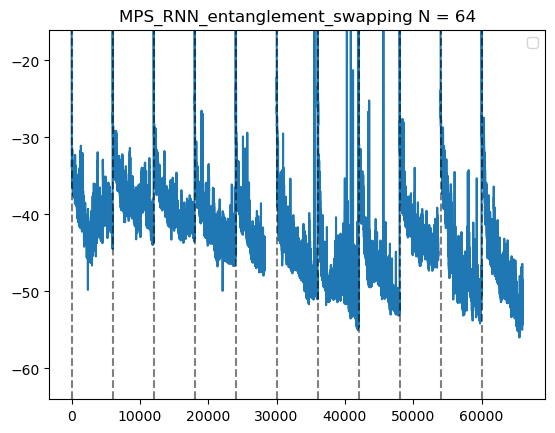

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


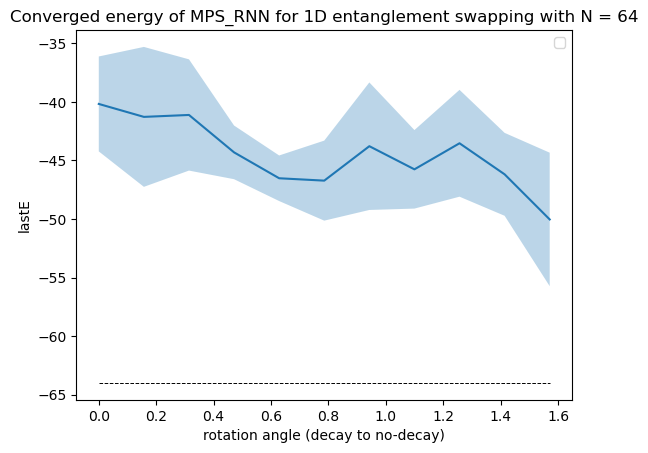

In [60]:
E = np.load("../MPS_RNN/result/meanE_L64_bonddim16_cmi_pattern_no_decayrotationTrueangle1.5707964_seed3.npy")
varE = np.load("../MPS_RNN/result/varE_L64_bonddim16_cmi_pattern_no_decayrotationTrueangle1.5707964_seed3.npy")
minE = E.reshape(11, -1)[:, 4000]
minE_var = np.sqrt(varE).reshape(11, -1)[:, 4000]
plt.plot(np.arange(E.shape[0]), E)
plt.title("MPS_RNN_result L=64")
for i in range(11):
    plt.plot([i*6000, i*6000], [-64, -16], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.ylim(-64, -16)
plt.title("MPS_RNN_entanglement_swapping N = 64")
plt.legend()
plt.show()

plt.title("Converged energy of MPS_RNN for 1D entanglement swapping with N = 64")
plt.plot(np.arange(11)/10*jnp.pi/2, minE)
plt.fill_between(np.arange(11)/10*jnp.pi/2, minE-minE_var, minE+minE_var, alpha = 0.3)
plt.xlabel("rotation angle (decay to no-decay)")
plt.ylabel("lastE")
plt.plot([0, jnp.pi/2], [-64, -64], 'k--', linewidth=0.7)
plt.legend()
plt.show()

In [56]:
minE

array([-49.794327+3.2730268e-06j, -43.96691 -3.1542663e-06j,
       -43.69247 -7.1455870e-06j, -49.92636 +2.6674925e-06j,
              nan          +nanj, -51.662617-4.1788799e-06j,
       -54.999817+1.6762176e-06j, -53.13765 -1.3657724e-05j,
              nan          +nanj, -54.160465+9.2944665e-06j,
       -55.97933 +2.9059079e-06j], dtype=complex64)